In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# For Numerical Data

In [27]:
df= pd.read_csv("train.csv",usecols=['Survived','Age','Fare'])
df.sample(5)

,Survived,Age,Fare
488,0,30.0,8.0500
289,1,22.0,7.7500
632,1,32.0,30.5000
147,0,9.0,34.3750
843,0,34.5,6.4375


In [28]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [29]:
X= df.drop(columns=["Survived"])
Y= df[["Survived"]]

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [60]:
X_train["Age_Imputed"]=X_train["Age"]
X_test["Age_Imputed"]=X_test["Age"]
X_train.shape, X_test.shape

((712, 3), (179, 3))

# Filling Missing Values

In [61]:
# For training data
X_train.loc[X_train['Age_Imputed'].isnull(), 'Age_Imputed'] = (
    X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
)

# For test data
X_test.loc[X_test['Age_Imputed'].isnull(), 'Age_Imputed'] = (
    X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
)

# Checking Distribution

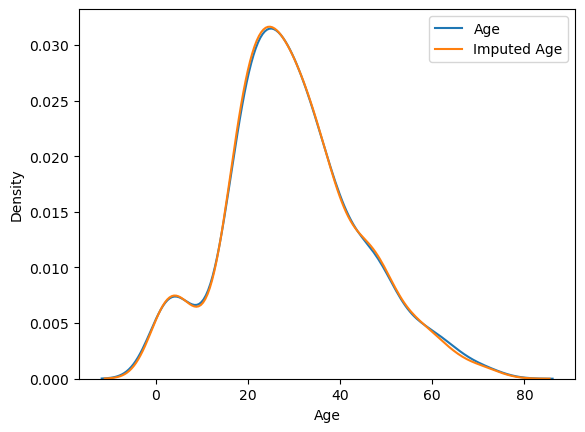

In [66]:
sns.kdeplot(x=X_train["Age"],label="Age")
sns.kdeplot(x=X_train["Age_Imputed"],label="Imputed Age")

plt.legend()

<Axes: ylabel='Age'>

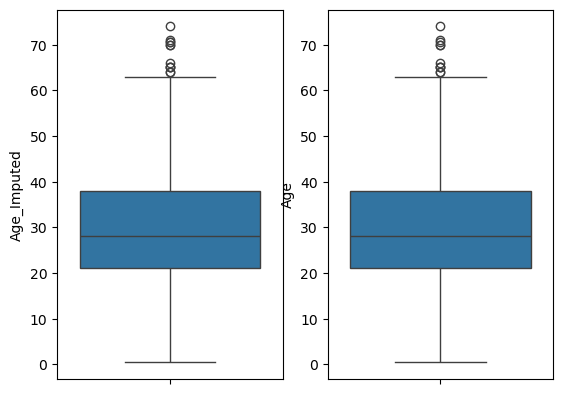

In [72]:
plt.subplot(121)
sns.boxplot(X_train["Age_Imputed"])
plt.subplot(122)
sns.boxplot(X_train["Age"])

In [97]:
# sampled_value= X_train["Age"].dropna().sample(1,random_state=int(observation["Fare"]))

# For Categorical Data

In [98]:
data= pd.read_csv("house-train.csv",usecols=["GarageQual","FireplaceQu","SalePrice"])
data.sample(5)

,FireplaceQu,GarageQual,SalePrice
253,NaN,TA,158000
471,Gd,TA,190000
187,NaN,Fa,135000
1006,TA,TA,163500
929,TA,TA,222000


In [99]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [100]:
X=data
Y= data["SalePrice"]


In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [103]:
X_train["GarageQual_Imputed"]=X_train["GarageQual"]
X_test["GarageQual_Imputed"]=X_test["GarageQual"]

X_train["FireplaceQu_Imputed"]=X_train["FireplaceQu"]
X_test["FireplaceQu_Imputed"]=X_test["FireplaceQu"]

# Filling Missing Values

In [104]:
# For training data
X_train.loc[X_train['GarageQual_Imputed'].isnull(), 'GarageQual_Imputed'] = (
    X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
)

# For test data
X_test.loc[X_test['GarageQual_Imputed'].isnull(), 'GarageQual_Imputed'] = (
    X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
)

# For training data
X_train.loc[X_train['FireplaceQu_Imputed'].isnull(), 'FireplaceQu_Imputed'] = (
    X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
)

# For test data
X_test.loc[X_test['FireplaceQu_Imputed'].isnull(), 'FireplaceQu_Imputed'] = (
    X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values
)

In [105]:
X_train.sample(10)

,FireplaceQu,GarageQual,SalePrice,GarageQual_Imputed,FireplaceQu_Imputed
9,TA,Gd,118000,Gd,TA
468,Gd,TA,250000,TA,Gd
958,NaN,TA,185000,TA,Gd
189,Gd,TA,286000,TA,Gd
25,Gd,TA,256300,TA,Gd
1228,Gd,TA,367294,TA,Gd
743,TA,TA,175000,TA,TA
931,NaN,TA,117500,TA,TA
1114,NaN,TA,117000,TA,TA
837,NaN,TA,100000,TA,TA


# Checking Before and After imputation

In [107]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_Imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.039384
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [108]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_Imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.500000
TA,0.412439,0.409247
Fa,0.040917,0.038527
Po,0.027823,0.028253
Ex,0.024550,0.023973
